In [68]:
import pandas as pd
import numpy as np
import re

In [60]:
locations = pd.read_csv("locations.csv", sep=',', encoding = "utf-8")
locations

,neighborhood,title,price,bedrooms,pid,longitude,date,subregion,link,latitude,sqft
0,(bayview),Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,$950,/ 1br -,4076905111,-122.396965,Sep 18 2013,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -
1,(bayview),Only walking distance to major shopping centers.,$950,/ 1br -,4076901755,-122.396793,Sep 18 2013,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -
2,(bayview),"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",$950,/ 1br -,4076899340,-122.397100,Sep 18 2013,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -
3,(financial district),"*NEW* Beautiful, Upscale Condo in Historic Jac...",$3300,/ 1br - 830ft² -,4067393707,-122.399747,Sep 18 2013,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -
4,(visitacion valley),楼上全层3房,$2000,/ 3br - 1280ft² -,4076901071,NaN,Sep 18 2013,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -
...,...,...,...,...,...,...,...,...,...,...,...
4995,(mountain view),2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,$2795,/ 2br - 940ft² -,4071933255,NaN,Sep 16 2013,Peninsula,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -
4996,(san mateo),2 Bathroom 1 Bathroom Apartment Downtown San M...,$2600,/ 2br - 955ft² -,4071969051,-122.325998,Sep 16 2013,Peninsula,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -
4997,(woodside),"Updated 2 BR+Den, House in Woodside for Lease",$4000,/ 2br -,4072004661,-122.274837,Sep 16 2013,Peninsula,/pen/apa/4072004661.html,37.454546,/ 2br -
4998,(foster city),Nobody above or below in this quiet Town home ...,$2395,/ 2br - 1020ft² -,4071994817,-122.261543,Sep 16 2013,Peninsula,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -


In [61]:
def clean_bedrooms(df):
    df['bedrooms']=df['bedrooms'].str.extract(r'(\d+)')
    return df
clean_bedrooms(locations)

,neighborhood,title,price,bedrooms,pid,longitude,date,subregion,link,latitude,sqft
0,(bayview),Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,$950,1,4076905111,-122.396965,Sep 18 2013,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -
1,(bayview),Only walking distance to major shopping centers.,$950,1,4076901755,-122.396793,Sep 18 2013,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -
2,(bayview),"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",$950,1,4076899340,-122.397100,Sep 18 2013,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -
3,(financial district),"*NEW* Beautiful, Upscale Condo in Historic Jac...",$3300,1,4067393707,-122.399747,Sep 18 2013,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -
4,(visitacion valley),楼上全层3房,$2000,3,4076901071,NaN,Sep 18 2013,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -
...,...,...,...,...,...,...,...,...,...,...,...
4995,(mountain view),2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,$2795,2,4071933255,NaN,Sep 16 2013,Peninsula,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -
4996,(san mateo),2 Bathroom 1 Bathroom Apartment Downtown San M...,$2600,2,4071969051,-122.325998,Sep 16 2013,Peninsula,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -
4997,(woodside),"Updated 2 BR+Den, House in Woodside for Lease",$4000,2,4072004661,-122.274837,Sep 16 2013,Peninsula,/pen/apa/4072004661.html,37.454546,/ 2br -
4998,(foster city),Nobody above or below in this quiet Town home ...,$2395,2,4071994817,-122.261543,Sep 16 2013,Peninsula,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -


In [62]:
locations['city'] = pd.Series(dtype='str')
locations

,neighborhood,title,price,bedrooms,pid,longitude,date,subregion,link,latitude,sqft,city
0,(bayview),Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,$950,1,4076905111,-122.396965,Sep 18 2013,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -,NaN
1,(bayview),Only walking distance to major shopping centers.,$950,1,4076901755,-122.396793,Sep 18 2013,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -,NaN
2,(bayview),"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",$950,1,4076899340,-122.397100,Sep 18 2013,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -,NaN
3,(financial district),"*NEW* Beautiful, Upscale Condo in Historic Jac...",$3300,1,4067393707,-122.399747,Sep 18 2013,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -,NaN
4,(visitacion valley),楼上全层3房,$2000,3,4076901071,NaN,Sep 18 2013,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,(mountain view),2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,$2795,2,4071933255,NaN,Sep 16 2013,Peninsula,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -,NaN
4996,(san mateo),2 Bathroom 1 Bathroom Apartment Downtown San M...,$2600,2,4071969051,-122.325998,Sep 16 2013,Peninsula,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -,NaN
4997,(woodside),"Updated 2 BR+Den, House in Woodside for Lease",$4000,2,4072004661,-122.274837,Sep 16 2013,Peninsula,/pen/apa/4072004661.html,37.454546,/ 2br -,NaN
4998,(foster city),Nobody above or below in this quiet Town home ...,$2395,2,4071994817,-122.261543,Sep 16 2013,Peninsula,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -,NaN


In [64]:
mylist=['Paris','Lyon','Dijon','Lille','Marseille','Strasbourg']
locations['city'] = np.resize(mylist,len(locations))
locations

,neighborhood,title,price,bedrooms,pid,longitude,date,subregion,link,latitude,sqft,city
0,(bayview),Take A TOUR ON OUR ONE FURNISHED BEDROOM TODAY,$950,1,4076905111,-122.396965,Sep 18 2013,SF,/sfc/apa/4076905111.html,37.761216,/ 1br -,Paris
1,(bayview),Only walking distance to major shopping centers.,$950,1,4076901755,-122.396793,Sep 18 2013,SF,/sfc/apa/4076901755.html,37.761080,/ 1br -,Lyon
2,(bayview),"furnished - 1 Bedroom(s), 1 Bath(s), Air Condi...",$950,1,4076899340,-122.397100,Sep 18 2013,SF,/sfc/apa/4076899340.html,37.762100,/ 1br -,Dijon
3,(financial district),"*NEW* Beautiful, Upscale Condo in Historic Jac...",$3300,1,4067393707,-122.399747,Sep 18 2013,SF,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -,Lille
4,(visitacion valley),楼上全层3房,$2000,3,4076901071,NaN,Sep 18 2013,SF,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -,Marseille
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,(mountain view),2BA LG Great Nbrhood/Granite Ctrs/Streams/Pool...,$2795,2,4071933255,NaN,Sep 16 2013,Peninsula,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -,Lille
4996,(san mateo),2 Bathroom 1 Bathroom Apartment Downtown San M...,$2600,2,4071969051,-122.325998,Sep 16 2013,Peninsula,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -,Marseille
4997,(woodside),"Updated 2 BR+Den, House in Woodside for Lease",$4000,2,4072004661,-122.274837,Sep 16 2013,Peninsula,/pen/apa/4072004661.html,37.454546,/ 2br -,Strasbourg
4998,(foster city),Nobody above or below in this quiet Town home ...,$2395,2,4071994817,-122.261543,Sep 16 2013,Peninsula,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -,Paris


In [36]:
del locations ["neighborhood"]
del locations['title']
del locations['pid']
del locations['date']
del locations['subregion']

In [37]:
locations

,price,bedrooms,longitude,link,latitude,sqft,city
0,$950,/ 1br -,-122.396965,/sfc/apa/4076905111.html,37.761216,/ 1br -,Paris
1,$950,/ 1br -,-122.396793,/sfc/apa/4076901755.html,37.761080,/ 1br -,Lyon
2,$950,/ 1br -,-122.397100,/sfc/apa/4076899340.html,37.762100,/ 1br -,Dijon
3,$3300,/ 1br - 830ft² -,-122.399747,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -,Paris
4,$2000,/ 3br - 1280ft² -,NaN,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -,Lyon
...,...,...,...,...,...,...,...
4995,$2795,/ 2br - 940ft² -,NaN,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -,Paris
4996,$2600,/ 2br - 955ft² -,-122.325998,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -,Lyon
4997,$4000,/ 2br -,-122.274837,/pen/apa/4072004661.html,37.454546,/ 2br -,Dijon
4998,$2395,/ 2br - 1020ft² -,-122.261543,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -,Paris


In [38]:
Months=['Sept','Oct','Nov','Dec','Jan','Fev','Mars','Avril','Juin','Juillet','Aout',]
locations['month'] = np.resize(Months,len(locations))
Years=['2022','2023']
locations['year'] = np.resize(Years,len(locations))
locations

,price,bedrooms,longitude,link,latitude,sqft,city,month,year
0,$950,/ 1br -,-122.396965,/sfc/apa/4076905111.html,37.761216,/ 1br -,Paris,Sept,2022
1,$950,/ 1br -,-122.396793,/sfc/apa/4076901755.html,37.761080,/ 1br -,Lyon,Oct,2023
2,$950,/ 1br -,-122.397100,/sfc/apa/4076899340.html,37.762100,/ 1br -,Dijon,Nov,2022
3,$3300,/ 1br - 830ft² -,-122.399747,/sfc/apa/4067393707.html,37.798108,/ 1br - 830ft² -,Paris,Dec,2023
4,$2000,/ 3br - 1280ft² -,NaN,/sfc/apa/4076901071.html,NaN,/ 3br - 1280ft² -,Lyon,Jan,2022
...,...,...,...,...,...,...,...,...,...
4995,$2795,/ 2br - 940ft² -,NaN,/pen/apa/4071933255.html,NaN,/ 2br - 940ft² -,Paris,Oct,2023
4996,$2600,/ 2br - 955ft² -,-122.325998,/pen/apa/4071969051.html,37.560763,/ 2br - 955ft² -,Lyon,Nov,2022
4997,$4000,/ 2br -,-122.274837,/pen/apa/4072004661.html,37.454546,/ 2br -,Dijon,Dec,2023
4998,$2395,/ 2br - 1020ft² -,-122.261543,/pen/apa/4071994817.html,37.555698,/ 2br - 1020ft² -,Paris,Jan,2022


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='city', ylabel='price'>

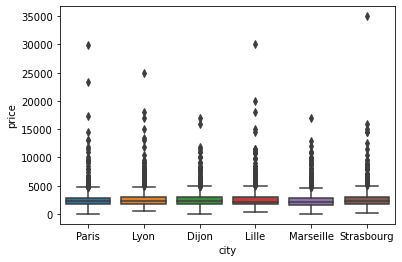

In [76]:
#locations['price']=locations['price'].str.replace("$","",regex=False)
#locations['price']=locations['price'].astype(float)
sns.boxplot(x=locations['city'], y=locations['price'])